In [1]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
path

Using Colab cache for faster access to the 'credit-risk-dataset' dataset.


'/kaggle/input/credit-risk-dataset'

In [108]:
import pandas as pd

df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')



### 📑 Features in the Credit Risk Dataset

| **Feature Name** | **What it Represents** | **Why it Matters in Credit Risk** |
|------------------|-------------------------|-----------------------------------|
| **person_age** | Age of the borrower | Younger borrowers may have shorter credit histories, older borrowers may have more stability. |
| **person_income** | Annual income | Higher income generally means better repayment ability. |
| **person_home_ownership** | Type of home ownership (RENT, OWN, MORTGAGE, OTHER) | Indicates financial stability and collateral potential. |
| **person_emp_length** | Employment length in years | Longer employment suggests job stability → lower risk. |
| **loan_intent** | Purpose of the loan (EDUCATION, MEDICAL, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT, VENTURE, etc.) | Loan purpose affects risk — e.g., debt consolidation vs. venture capital. |
| **loan_grade** | Loan grade assigned (A–G) | A credit risk category; A = safest, G = riskiest. |
| **loan_amnt** | Loan amount requested | Larger loans = higher exposure for lender. |
| **loan_int_rate** | Interest rate charged | Higher rates usually go to riskier borrowers. |
| **loan_status** | Target variable: 0 = non-default, 1 = default | This is what you’re predicting (default risk). |
| **loan_percent_income** | Loan amount as a percentage of borrower’s income | Measures affordability; high ratios = higher risk. |
| **cb_person_default_on_file** | Whether borrower has a history of default (Yes/No) | Past defaults are strong predictors of future defaults. |
| **cb_preson_cred_hist_length** | Length of borrower’s credit history (years) | Longer history = more data to judge reliability. |

---


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.shape

(32581, 12)

In [7]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [8]:
df.shape[0]

32581

In [9]:

print( 'Duplicated Rows values are : ', df.duplicated().sum())

df=df.drop_duplicates()

Duplicated Rows values are :  165


In [10]:
df.shape

(32416, 12)

In [11]:
df.person_emp_length.isnull().sum()

np.int64(887)

In [12]:
df.person_emp_length.mode()

,person_emp_length
0,0.0


In [13]:
df.person_emp_length.median()

4.0

In [14]:
df.person_emp_length.mean()

np.float64(4.7905103238288556)

In [15]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mean())

In [16]:
df['person_emp_length'].isnull().sum()

np.int64(0)

In [17]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [18]:
df.loan_int_rate.isnull().sum()

np.int64(3095)

In [19]:
df.loan_int_rate.head()

,loan_int_rate
0,16.02
1,11.14
2,12.87
3,15.23
4,14.27


In [20]:
df.loan_int_rate.median()

10.99

In [21]:
df.loan_int_rate.mode()

,loan_int_rate
0,7.51


In [22]:
df.loan_int_rate.mean()

np.float64(11.017265100098905)

In [23]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [24]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [25]:
df['person_home_ownership'].value_counts(normalize=True)

,proportion
person_home_ownership,
RENT,0.505244
MORTGAGE,0.412420
OWN,0.079066
OTHER,0.003270


In [109]:
num_cols = df.select_dtypes(include='int').columns
cat_cols = df.select_dtypes(include='object').columns


In [110]:
num_cols

Index(['person_age', 'person_income', 'loan_amnt', 'loan_status',
       'cb_person_cred_hist_length'],
      dtype='object')

In [111]:
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

#EDA


# 📊 Exploratory Data Analysis (EDA) – Credit Risk Dataset
## 🔹 Step 0: Import Required Libraries (EDA Cell)


In [114]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")






## 🔹 Step 1: Define Numerical & Categorical Columns


In [115]:


num_cols = [
    'person_age',
    'person_income',
    'loan_amnt',
    'cb_person_cred_hist_length'
]

cat_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

target = 'loan_status'






# ===============================

# 🔍 UNIVARIATE ANALYSIS

# ===============================



## 🔹 Step 2: Univariate Analysis – Numerical Features

### 📌 Distribution + Boxplot (Outliers)



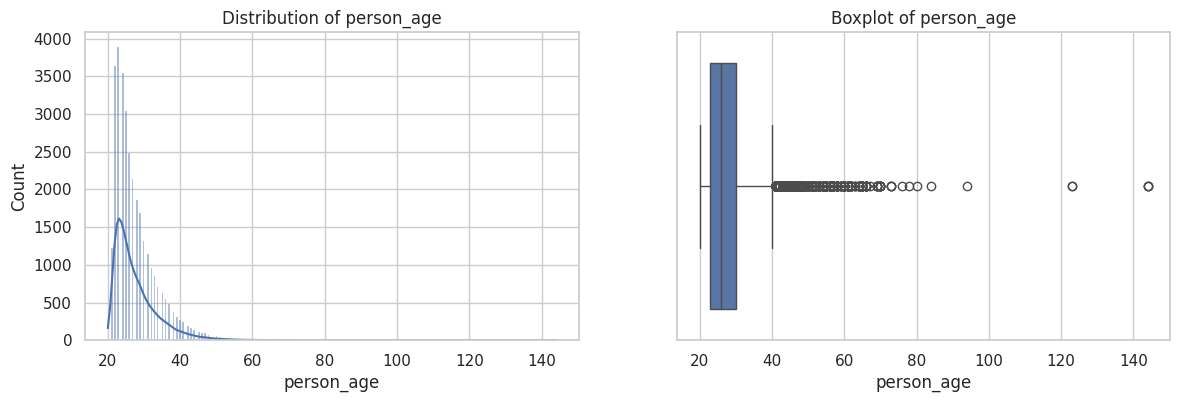

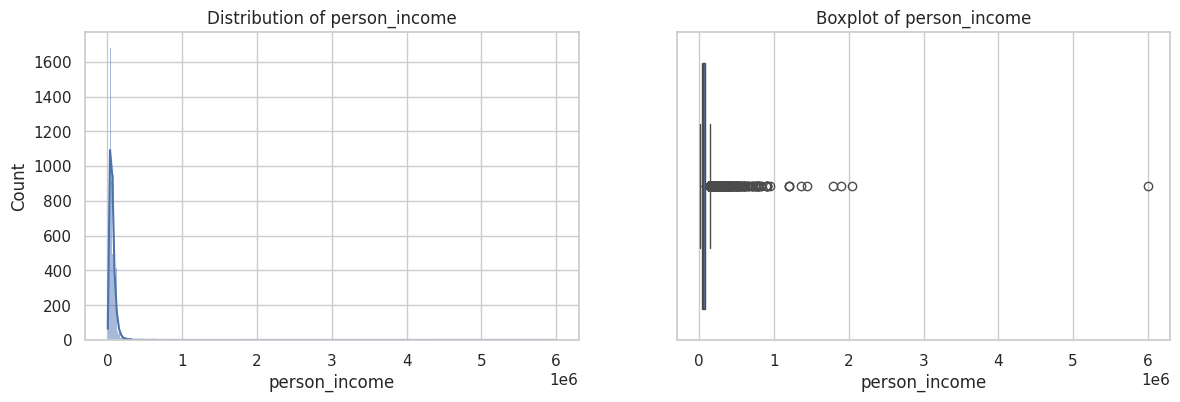

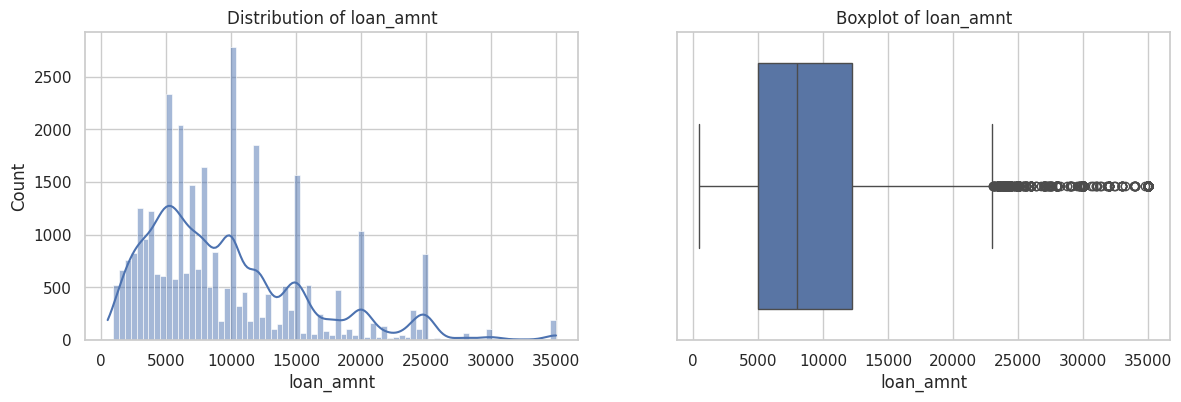

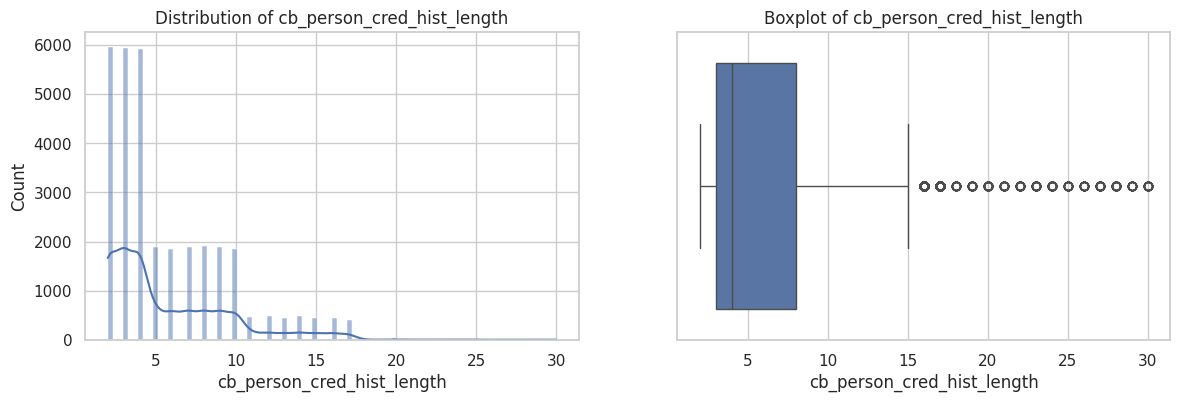

In [116]:

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.show()




### 🔍 What this tells you:

* Data distribution
* Skewness
* Presence of outliers
* Whether transformation is needed

---

## 🔹 Step 3: Univariate Analysis – Categorical Features


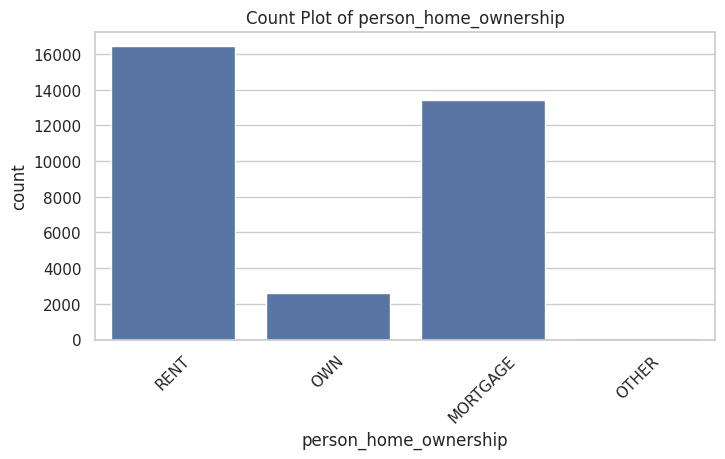

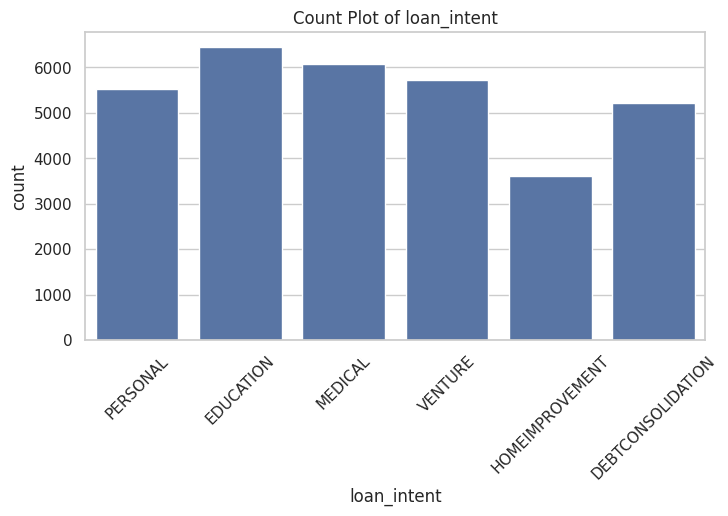

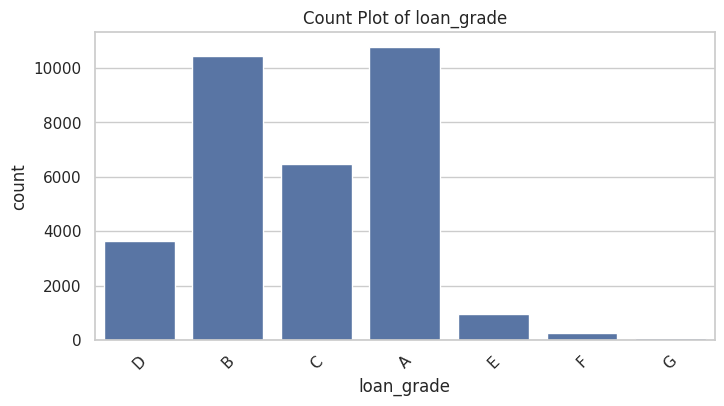

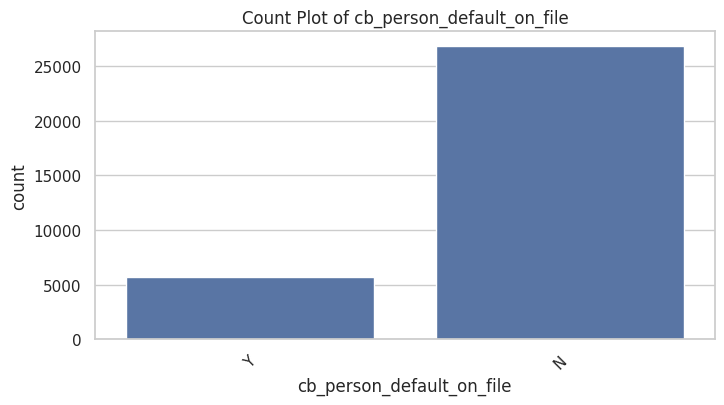

In [117]:


for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()




### 🔍 What this tells you:

* Category frequency
* Dominant classes
* Rare categories (important for risk modeling)

---

## 🔹 Step 4: Target Variable Distribution


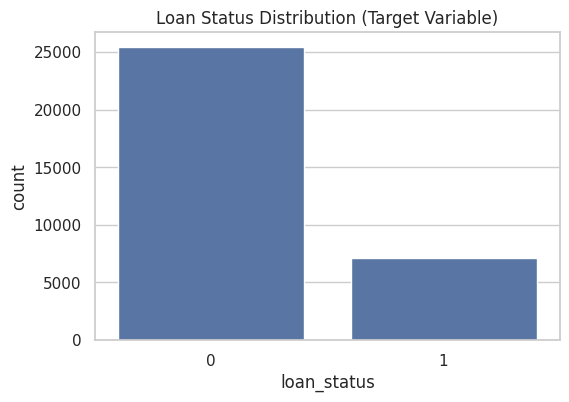

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


In [118]:

plt.figure(figsize=(6,4))
sns.countplot(x=df[target])
plt.title("Loan Status Distribution (Target Variable)")
plt.show()

print(df[target].value_counts(normalize=True))




📌 Confirms **class imbalance**, which justifies:

* class_weight
* scale_pos_weight
* threshold tuning

---

# ===============================

# 🔗 BIVARIATE ANALYSIS

# ===============================

---

## 🔹 Step 5: Numerical Features vs Loan Status

### 📌 Boxplot (Risk Comparison)


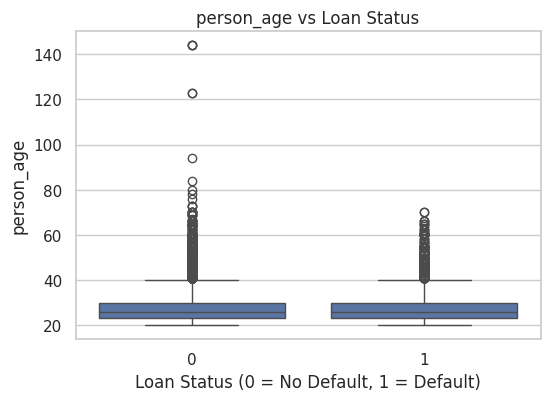

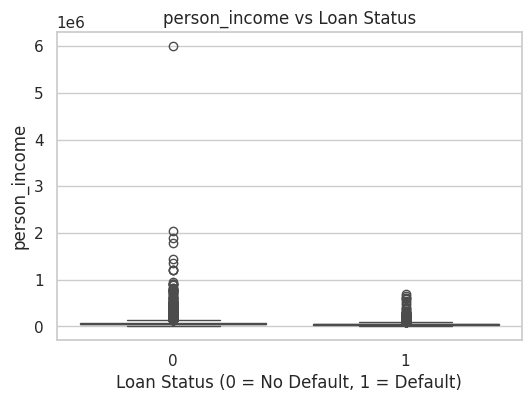

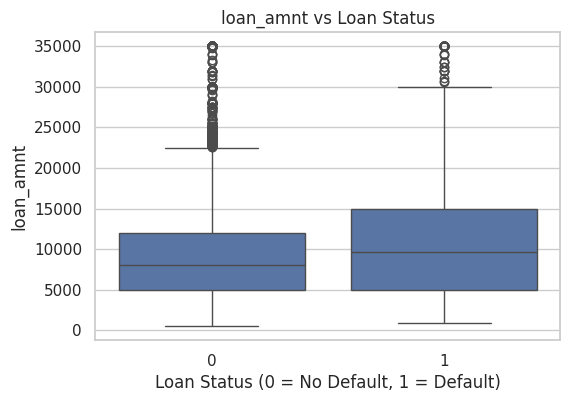

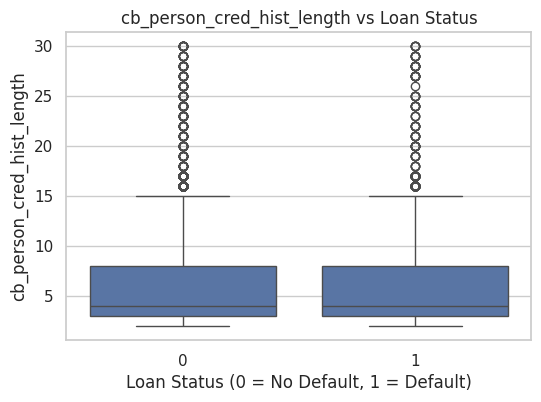

In [119]:

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs Loan Status")
    plt.xlabel("Loan Status (0 = No Default, 1 = Default)")
    plt.show()



### 🔍 Interpretation:

* See how feature values differ between:

  * Defaulters
  * Non-defaulters

---

## 🔹 Step 6: Numerical Features vs Loan Status (Mean Comparison)


In [121]:


df.groupby(target)[num_cols].mean()


,person_age,person_income,loan_amnt,cb_person_cred_hist_length
loan_status,,,,
0,27.807129,70804.361559,9237.464178,5.837475
1,27.474676,49125.652223,10850.502954,5.685003




📌 Shows **average behavior of risky vs safe borrowers**

---

## 🔹 Step 7: Categorical Features vs Loan Status (Default Rate)


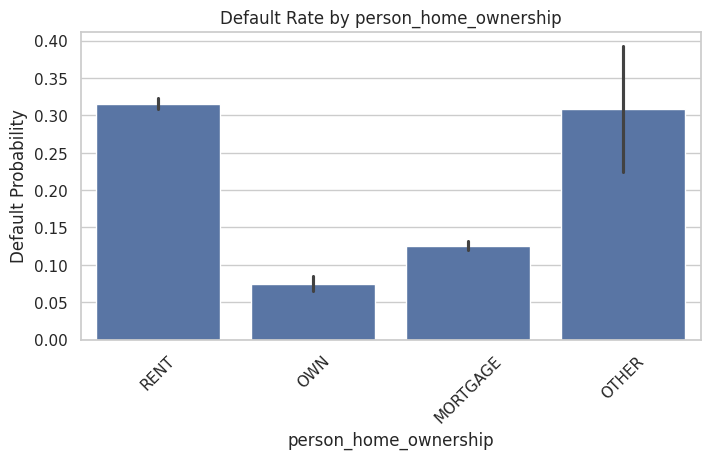

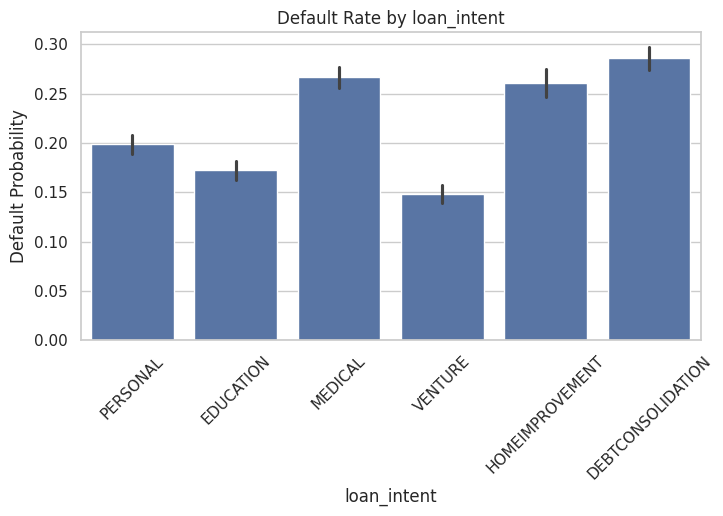

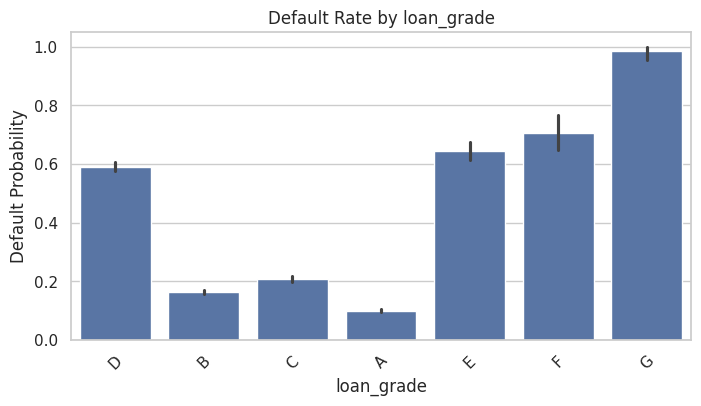

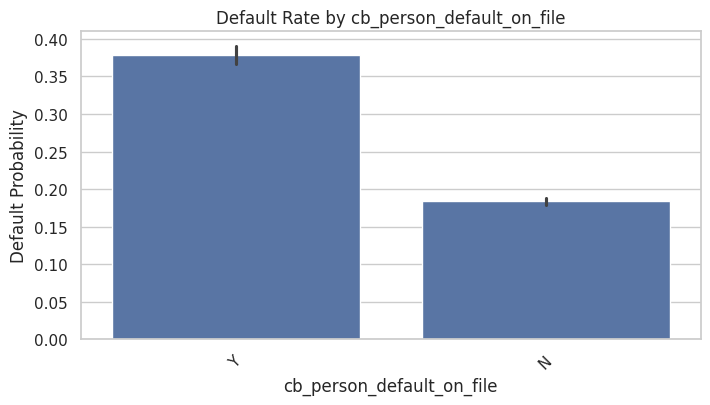

In [123]:

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(
        x=df[col],
        y=df[target],
        estimator=np.mean
    )
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Probability")
    plt.xticks(rotation=45)
    plt.show()



### 🔍 This is VERY IMPORTANT in credit risk:

* Shows **probability of default**
* Used directly in **business decisions**

---

## 🔹 Step 8: Loan Status vs Loan Amount (Risk Exposure)


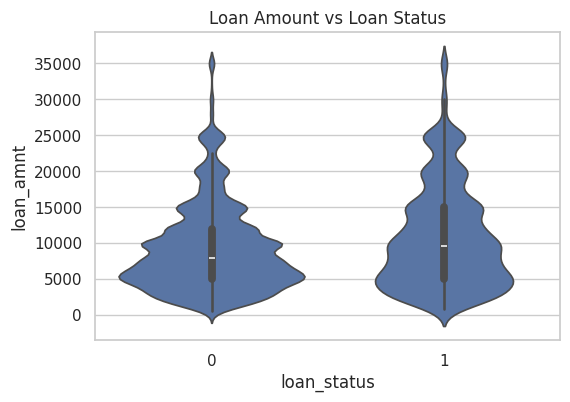

In [125]:


plt.figure(figsize=(6,4))
sns.violinplot(x=df[target], y=df['loan_amnt'])
plt.title("Loan Amount vs Loan Status")
plt.show()



📌 Helps understand **financial exposure risk**

---

## 🔹 Step 9: Correlation Heatmap (Numerical Features)


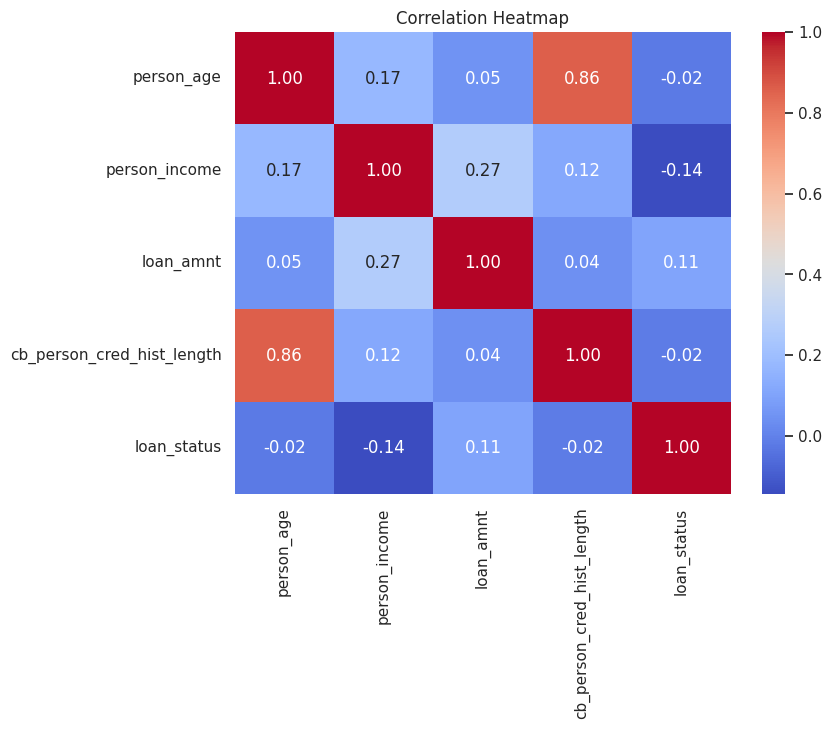

In [126]:

plt.figure(figsize=(8,6))
corr = df[num_cols + [target]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


In [27]:
df.person_emp_length.info()

<class 'pandas.core.series.Series'>
Index: 32416 entries, 0 to 32580
Series name: person_emp_length
Non-Null Count  Dtype  
--------------  -----  
32416 non-null  float64
dtypes: float64(1)
memory usage: 506.5 KB


In [28]:
df.loan_grade.head()

,loan_grade
0,D
1,B
2,C
3,C
4,C


In [29]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [30]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.781312
1,0.218688


In [31]:
for i in cat_cols:
  print(f'{i} : Proportion : {df[i].value_counts(normalize=True)}')
  print('_'*50)


person_home_ownership : Proportion : person_home_ownership
RENT        0.505244
MORTGAGE    0.412420
OWN         0.079066
OTHER       0.003270
Name: proportion, dtype: float64
__________________________________________________
loan_intent : Proportion : loan_intent
EDUCATION            0.197773
MEDICAL              0.186389
VENTURE              0.175284
PERSONAL             0.169608
DEBTCONSOLIDATION    0.160075
HOMEIMPROVEMENT      0.110871
Name: proportion, dtype: float64
__________________________________________________
loan_grade : Proportion : loan_grade
A    0.330176
B    0.320428
C    0.198606
D    0.111673
E    0.029708
F    0.007435
G    0.001974
Name: proportion, dtype: float64
__________________________________________________
cb_person_default_on_file : Proportion : cb_person_default_on_file
N    0.823235
Y    0.176765
Name: proportion, dtype: float64
__________________________________________________


In [32]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [33]:
fuisop[]

SyntaxError: invalid syntax (ipython-input-3167620769.py, line 1)

In [34]:
df.person_home_ownership.value_counts()

,count
person_home_ownership,
RENT,16378
MORTGAGE,13369
OWN,2563
OTHER,106


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['person_home_ownership'] = encoder.fit_transform(df['person_home_ownership'])

df['person_home_ownership']

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [36]:
df['person_home_ownership'].head()

,person_home_ownership
0,3
1,2
2,0
3,3
4,3


In [37]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6411
MEDICAL,6042
VENTURE,5682
PERSONAL,5498
DEBTCONSOLIDATION,5189
HOMEIMPROVEMENT,3594


In [38]:
from sklearn.preprocessing import LabelEncoder


In [39]:
loanencoder = LabelEncoder()

df['loan_intent'] = loanencoder.fit_transform(df['loan_intent'])



In [40]:
df['loan_intent'].head()

,loan_intent
0,4
1,1
2,3
3,3
4,3


In [41]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,D,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,1,B,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,3,C,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,3,C,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,3,C,35000,14.27,1,0.55,Y,4


In [42]:
df['loan_grade'].value_counts()

,count
loan_grade,
A,10703
B,10387
C,6438
D,3620
E,963
F,241
G,64


In [43]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['A','B','C','D','E','F','G']]

oe = OrdinalEncoder(categories = categories)
encoder = oe.fit(df[['loan_grade']])
df['loan_grade']= oe.transform(df[['loan_grade']])
df['loan_grade']

,loan_grade
0,3.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
32576,2.0
32577,0.0
32578,1.0
32579,1.0


In [44]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,Y,4


In [45]:
df['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,26686
Y,5730


In [46]:
person_map = {'Y':1,
              'N':0
              }

df['person_file'] = df['cb_person_default_on_file'].map(person_map)


In [47]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_file
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,Y,3,1
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,N,2,0
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,N,3,0
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,N,2,0
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,Y,4,1


In [48]:
df.drop(columns=['cb_person_default_on_file'],axis = 1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_file
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,3,1
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,2,0
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,3,0
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,2,0
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2.0,5800,13.16,0,0.11,30,0
32577,54,120000,0,4.0,4,0.0,17625,7.49,0,0.15,19,0
32578,65,76000,3,3.0,2,1.0,35000,10.99,1,0.46,28,0
32579,56,150000,0,5.0,4,1.0,15000,11.48,0,0.10,26,0


In [49]:
rename_columns = {
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'employment_length',
    'loan_intent': 'loan_intent',
    'loan_grade': 'loan_grade',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'interest_rate',
    'loan_status': 'loan_status',
    'loan_percent_income': 'loan_percent_income',
    'cb_person_default_on_file': 'default_history', # 'cb' हटाकर इसे स्पष्ट किया
    'cb_person_cred_hist_length': 'credit_hist_length' # छोटा और साफ़ नाम
}

df.rename(columns=rename_columns, inplace=True)

In [50]:
df.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,default_history,credit_hist_length,person_file
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,Y,3,1
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,N,2,0
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,N,3,0
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,N,2,0
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,Y,4,1


In [51]:
df = df.drop(columns=['default_history'])
df.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,credit_hist_length,person_file
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,3,1
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,2,0
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,3,0
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,2,0
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,4,1


In [52]:
df = df.drop(columns=['person_file'])

In [53]:
df.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,credit_hist_length
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,3
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,2
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,3
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,2
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,4


In [54]:
x = df.drop(columns=['loan_status'])
y= df['loan_status']

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled[:-1]

array([[-0.90447055, -0.11435433,  0.92303999, ...,  1.62352688,
         3.92986465, -0.69261376],
       [-1.06185168, -0.91094064,  0.22528185, ...,  0.04065455,
        -0.65770679, -0.93898181],
       [-0.43232717, -0.91094064, -1.17023441, ...,  0.60179577,
         3.74261683, -0.69261376],
       ...,
       [ 4.13172558,  0.86928463, -1.17023441, ..., -1.1432561 ,
        -0.18958726,  3.24927517],
       [ 5.862918  ,  0.15977456,  0.92303999, ..., -0.00799931,
         2.71275386,  5.4665877 ],
       [ 4.44648784,  1.3530415 , -1.17023441, ...,  0.15093664,
        -0.65770679,  4.97385158]])

In [55]:
sdfghjk

NameError: name 'sdfghjk' is not defined

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y, test_size=0.2, random_state = 42)


models...

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score


models={
    'Logistic Regression':LogisticRegression(class_weight='balanced',max_iter=10000),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_estimators=200),
    'Gradient Boosting':GradientBoostingClassifier(),
    'XgBoosting':xgb.XGBClassifier(scale_pos_weight = len(y[y==0])/len(y[y==1]),use_label_encoder=False,eval_metric='logloss'),
    'SVM':SVC(class_weight='balanced',probability=True)

}


In [65]:
for name, model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_probab = model.predict_probab(x_test)[:,-1] if hasattr(model,"predict_probab") else None

  print(f"\n {name}")

  print(classification_report(y_test, y_pred))
  if y_probab is not None:
    print("ROC-AUC: ",roc_auc_score(y_test,y_probab) )



 Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      5066
           1       0.51      0.78      0.61      1418

    accuracy                           0.79      6484
   macro avg       0.72      0.78      0.73      6484
weighted avg       0.83      0.79      0.80      6484


 Random Forest
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5066
           1       0.98      0.70      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484


 Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5066
           1       0.93      0.70      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.92      0.84      0.87      6484
weighted avg    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:53:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XgBoosting
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5066
           1       0.84      0.80      0.82      1418

    accuracy                           0.92      6484
   macro avg       0.89      0.88      0.88      6484
weighted avg       0.92      0.92      0.92      6484


 SVM
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5066
           1       0.64      0.76      0.69      1418

    accuracy                           0.85      6484
   macro avg       0.79      0.82      0.80      6484
weighted avg       0.87      0.85      0.86      6484



In [66]:
param_grid = {
     'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [len(y[y==0]) / len(y[y==1])]
}

In [70]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=60,              # 🔥 60 is more than enough
    scoring='roc_auc',      # or 'accuracy' / 'f1'
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best Model:", random_search.best_estimator_)
print("Best CV Score:", random_search.best_score_)
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:59:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)
Best CV Score: 0.94636387580496
Best Params: {'subsample': 1.0, 'scale_pos_weight': 3.572718295951474, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample

In [72]:
best_model = random_search.best_estimator_

In [74]:
best_model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],

    verbose=True
)


[0]	validation_0-logloss:0.66884
[1]	validation_0-logloss:0.64695
[2]	validation_0-logloss:0.62553
[3]	validation_0-logloss:0.60741
[4]	validation_0-logloss:0.58877
[5]	validation_0-logloss:0.57824
[6]	validation_0-logloss:0.56262
[7]	validation_0-logloss:0.54764
[8]	validation_0-logloss:0.53597
[9]	validation_0-logloss:0.52401
[10]	validation_0-logloss:0.51292
[11]	validation_0-logloss:0.50237
[12]	validation_0-logloss:0.49241
[13]	validation_0-logloss:0.48271
[14]	validation_0-logloss:0.47484
[15]	validation_0-logloss:0.46678
[16]	validation_0-logloss:0.45810
[17]	validation_0-logloss:0.45135


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:45:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[18]	validation_0-logloss:0.44489
[19]	validation_0-logloss:0.43752
[20]	validation_0-logloss:0.43101
[21]	validation_0-logloss:0.42491
[22]	validation_0-logloss:0.41938
[23]	validation_0-logloss:0.41387
[24]	validation_0-logloss:0.40976
[25]	validation_0-logloss:0.40407
[26]	validation_0-logloss:0.39930
[27]	validation_0-logloss:0.39592
[28]	validation_0-logloss:0.39177
[29]	validation_0-logloss:0.38758
[30]	validation_0-logloss:0.38357
[31]	validation_0-logloss:0.37950
[32]	validation_0-logloss:0.37671
[33]	validation_0-logloss:0.37309
[34]	validation_0-logloss:0.36938
[35]	validation_0-logloss:0.36586
[36]	validation_0-logloss:0.36270
[37]	validation_0-logloss:0.36007
[38]	validation_0-logloss:0.35811
[39]	validation_0-logloss:0.35618
[40]	validation_0-logloss:0.35321
[41]	validation_0-logloss:0.35100
[42]	validation_0-logloss:0.34894
[43]	validation_0-logloss:0.34578
[44]	validation_0-logloss:0.34298
[45]	validation_0-logloss:0.34100
[46]	validation_0-logloss:0.33907
[47]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [75]:
y_pred = best_model.predict(x_test)

In [76]:
y_prob = best_model.predict_proba(x_test)[:,1]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5066
           1       0.84      0.80      0.82      1418

    accuracy                           0.92      6484
   macro avg       0.89      0.88      0.88      6484
weighted avg       0.92      0.92      0.92      6484



In [79]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


ROC-AUC: 0.9485801524252226


In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[4848  218]
 [ 289 1129]]


In [82]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

for t in [0.3, 0.4, 0.5, 0.6,0.8]:
    preds = (y_prob >= t).astype(int)
    print(
        f"Threshold {t}:",
        "Accuracy:", accuracy_score(y_test, preds),
        "F1:", f1_score(y_test, preds)
    )


Threshold 0.3: Accuracy: 0.830505860579889 F1: 0.6996447116698552
Threshold 0.4: Accuracy: 0.8869524984577422 F1: 0.7649887784546329
Threshold 0.5: Accuracy: 0.9218075262183837 F1: 0.816636528028933
Threshold 0.6: Accuracy: 0.9339913633559531 F1: 0.834108527131783
Threshold 0.8: Accuracy: 0.9339913633559531 F1: 0.8241577649958916


In [84]:
import numpy as np

threshold = 0.6
y_pred_custom = (y_prob >= threshold).astype(int)


In [89]:
classification_report(y_test, y_pred_custom)

'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96      5066\n           1       0.93      0.76      0.83      1418\n\n    accuracy                           0.93      6484\n   macro avg       0.93      0.87      0.90      6484\nweighted avg       0.93      0.93      0.93      6484\n'

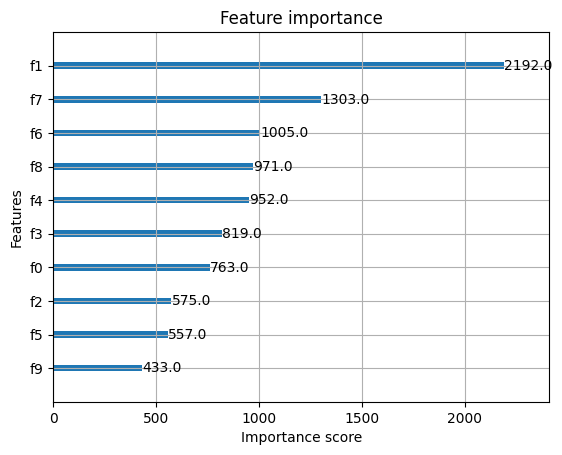

In [86]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_model, max_num_features=15)
plt.show()


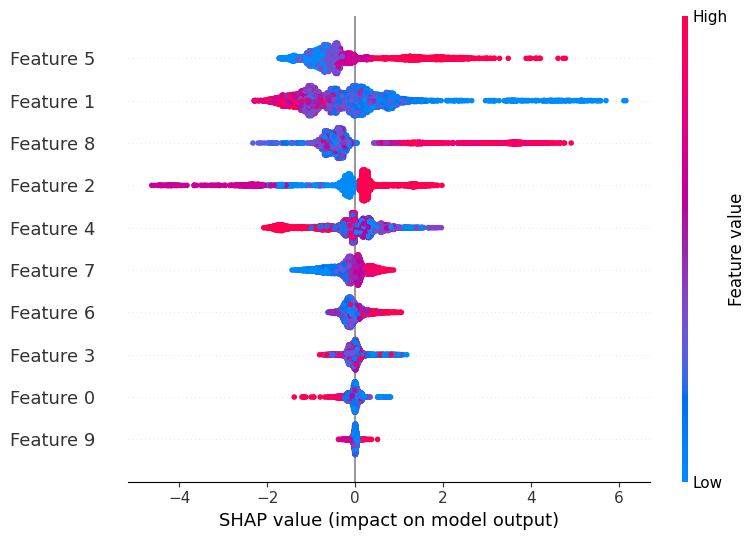

In [87]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


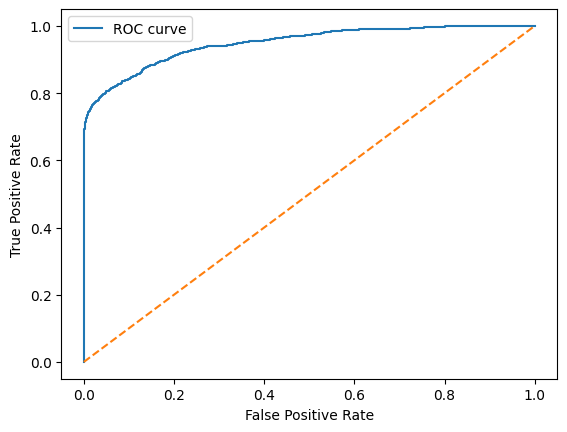

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [127]:
import joblib

In [128]:
bundle={
  "encoder": encoder,
  "loanencoder": loanencoder,
  "ohe": oe,
  "scaler": scaler,
  "best_model": best_model,
  "threshold": threshold
}
joblib.dump(bundle,'xgb_model.pkl')

['xgb_model.pkl']

In [94]:
bundle=joblib.load('xgb_model.pkl')
encoder=bundle['encoder']
loanencoder = bundle['loanencoder']
ohe = bundle['ohe']
scaler = bundle['scaler']
best_model=bundle['best_model']
threshold = bundle['threshold']


In [95]:
df.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,credit_hist_length
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,3
1,21,9600,2,5.0,1,1.0,1000,11.14,0,0.10,2
2,25,9600,0,1.0,3,2.0,5500,12.87,1,0.57,3
3,23,65500,3,4.0,3,2.0,35000,15.23,1,0.53,2
4,24,54400,3,8.0,3,2.0,35000,14.27,1,0.55,4


In [ ]:
#person_home_ownership -> encoder
# loan_intent->loanencoder
# oe = loan grade
# scaler = std scaler

In [97]:
import pandas as pd

data = {
    "age": [22],
    "income": [59000],
    "home_ownership": ["RENT"],
    "employment_length": [123.0],
    "loan_intent": ["PERSONAL"],
    "loan_grade": ["D"],
    "loan_amount": [35000],
    "interest_rate": [16.02],
    "loan_status": [1],
    "loan_percent_income": [0.59],
    "credit_hist_length": [3]
}

df = pd.DataFrame(data)

df

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,credit_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3


In [100]:
df['loan_intent']

,loan_intent
0,PERSONAL


In [102]:
df['home_ownership']

,home_ownership
0,RENT


In [101]:
df['home_owenership']=encoder.fit_transform(df['home_ownership'])
df['loan_intent'] = loanencoder.fit_transform(df['loan_intent'])
df['loan_grade'] = oe.transform(df['loan_grade'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [103]:
import pandas as pd

df = pd.DataFrame({
    "age": [22],
    "income": [59000],
    "home_ownership": [3],
    "employment_length": [123.0],
    "loan_intent": [4],
    "loan_grade": [3.0],
    "loan_amount": [35000],
    "interest_rate": [16.02],
    "loan_status": [1],
    "loan_percent_income": [0.59],
    "credit_hist_length": [3]
})

df


,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,credit_hist_length
0,22,59000,3,123.0,4,3.0,35000,16.02,1,0.59,3


In [105]:
x= df.drop(columns=['loan_status'])
y= df['loan_status']


In [107]:
print(best_model.predict(x))

[0]
